In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import colour
import colour.colorimetry as color

%matplotlib inline

In [2]:
xc1 = np.poly1d((-0.2661239, -0.2343580, 0.8776956, 0.177910))
xc2 = np.poly1d((-3.0258469, 2.1070379, 0.2226347, 0.240390))

yc1 = np.poly1d((-1.1063814, -1.34811020, 2.18555832, -0.20219683))
yc2 = np.poly1d((-0.9549476, -1.37418593, 2.09137015, -0.16748867))
yc3 = np.poly1d((3.0817580, -5.87338670, 3.75112997, -0.37001483))

In [3]:
def xy(T):
    x = np.piecewise(1000/T, [T < 1667, T <= 4000, T <= 25000], [np.nan, xc1, xc2, np.nan])
    y = np.piecewise(x, [T < 1667, T <= 2222, T <= 4000, T <= 25000], [np.nan, yc1, yc2, yc3, np.nan])
    return x, y

In [4]:
XYZ2RGB = np.array(
    [[3.2406, -1.5372, -0.04986],
    [-0.9689, 1.8758, 0.0415],
    [0.0577, -0.02040, 1.0570]]
)

In [5]:
def XYZ(xy):
    x, y = xy
    Y = np.piecewise(y, [y == 0], [0, 1])
    with np.errstate(divide='ignore'):
        X = x * Y / y
        X[y == 0] = 0
        Z = (1 - x - y) * Y / y
        Z[y == 0] = 0
        return np.stack((X, Y, Z))
    
def RGB(XYZ):
    return np.dot(XYZ2RGB, XYZ).T

In [6]:
xy(np.array([2500]))

(array([ 0.47291574]), array([ 0.41632391]))

In [7]:
np.dot([-0.9689, 1.8758, 0.0415], XYZ(xy(T))[:,0])

NameError: name 'T' is not defined

In [143]:
np.dot(XYZ2RGB, XYZ(xy(T)))[:,0]

array([ 2.19717262,  0.76537476,  0.28902826])

In [8]:
def gamma(RGB, a=0.055):
    RGB[RGB > 1] = 1
    return np.piecewise(RGB, [RGB <= 0.0031308], [lambda C: 12.92*C, lambda C: (1+a)*np.power(C, 1/2.4)-a])

In [9]:
def T2RGB(T):
    t = T/100
    t = np.piecewise(t, [t < 10, t <= 400], [np.nan, t, np.nan])
    r = np.piecewise(t, [t <= 66],
                     [1, lambda t: 1.29293618606 * np.power(t - 60, -0.1332047592)])
    g = np.piecewise(t, [t <= 66],
                     [lambda t: 0.39008157876 * np.log(t) - 0.63184144378,
                     lambda t: 1.1298908609 * np.power(t - 60, -0.0755148492)])
    b = np.piecewise(t, [t <= 19, t < 66],
                    [0,
                    lambda t: 0.54320678911 * np.log(t - 10) - 1.19625408914,
                    1])
    rgb = np.vstack((r, g, b)).T
    rgb[rgb > 1] = 1
    rgb[rgb < 0] = 0
    return rgb

In [19]:
T = np.linspace(798, 25000, 100)
rgb = T2RGB(T)

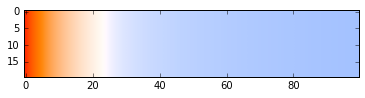

In [20]:
plt.imshow(np.stack((rgb,)*20))